In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
print(X_train.shape,X_test.shape)

(426, 30) (143, 30)


In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train,y_train)
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.955399061033
0.958041958042


In [6]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))

0.971830985915
0.965034965035


In [7]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print(logreg001.score(X_train,y_train))
print(logreg001.score(X_test,y_test))

0.934272300469
0.93006993007


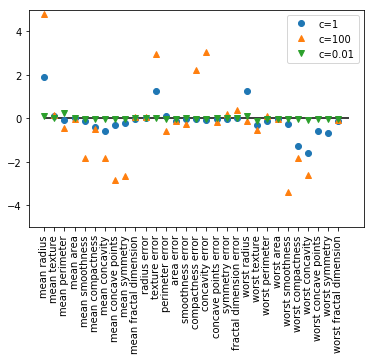

In [20]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.plot(logreg.coef_.T,'o',label='c=1')
plt.plot(logreg100.coef_.T,'^',label='c=100')
plt.plot(logreg001.coef_.T,'v',label='c=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.legend()

0.913145539906
0.923076923077
0.960093896714
0.958041958042
0.985915492958
0.979020979021


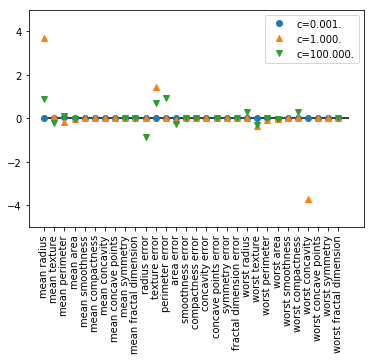

In [22]:
for c, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=c,penalty='l1').fit(X_train,y_train)
    print(lr_l1.score(X_train,y_train))
    print(lr_l1.score(X_test,y_test))
    
    plt.plot(lr_l1.coef_.T,marker,label='c={:.3f}.'.format(c))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.legend()